<a href="https://colab.research.google.com/github/JuanCOD001116/Proyecto-Modelos/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.01 - PROYECTO KAGGLE

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


## load `train.csv` data with pandas



In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# Cantidad de estudiantes evaluados por departamento

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

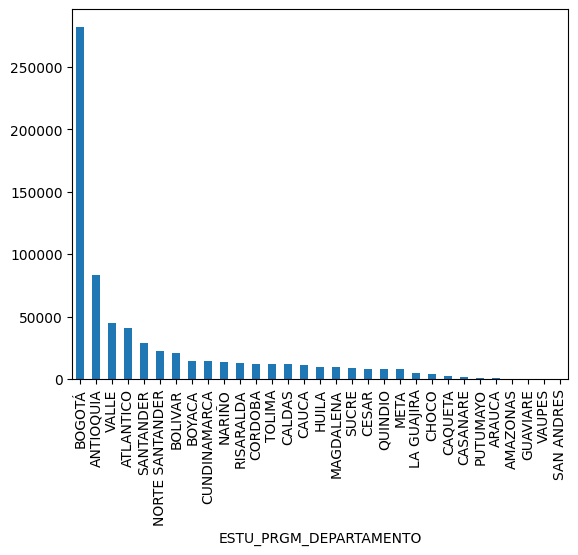

In [ ]:
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

# Rendimiento Global

In [ ]:
z.RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


<Axes: xlabel='RENDIMIENTO_GLOBAL'>

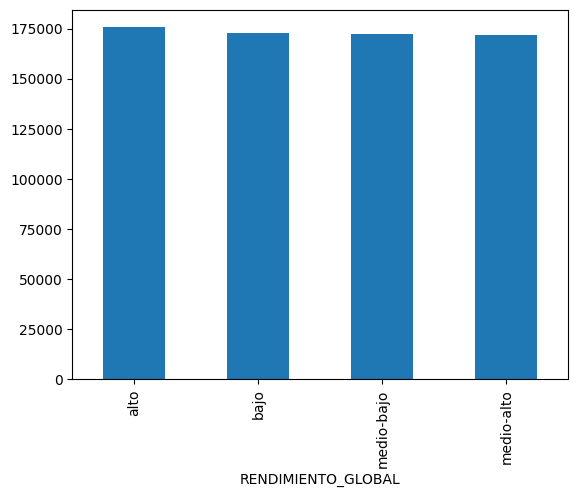

In [ ]:
z.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

# Cantidad de estudiantes segun su costo de matricula

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

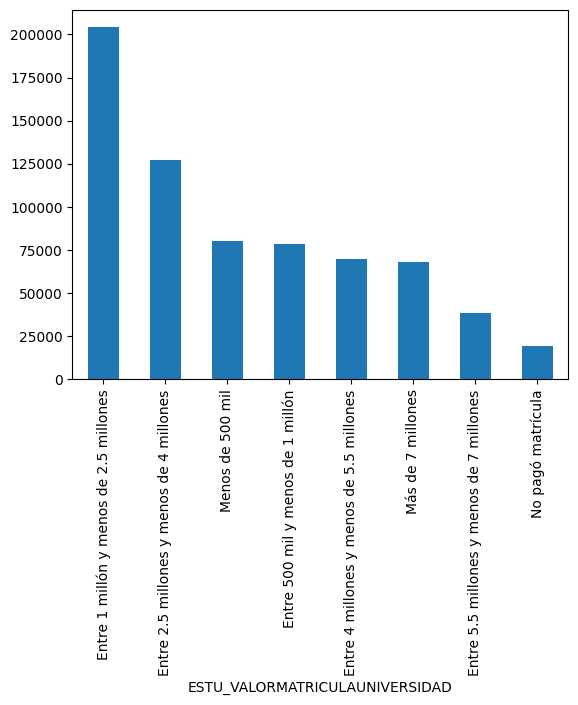

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

# Rendimiento Global segun el costo de matricula de los estudiantes

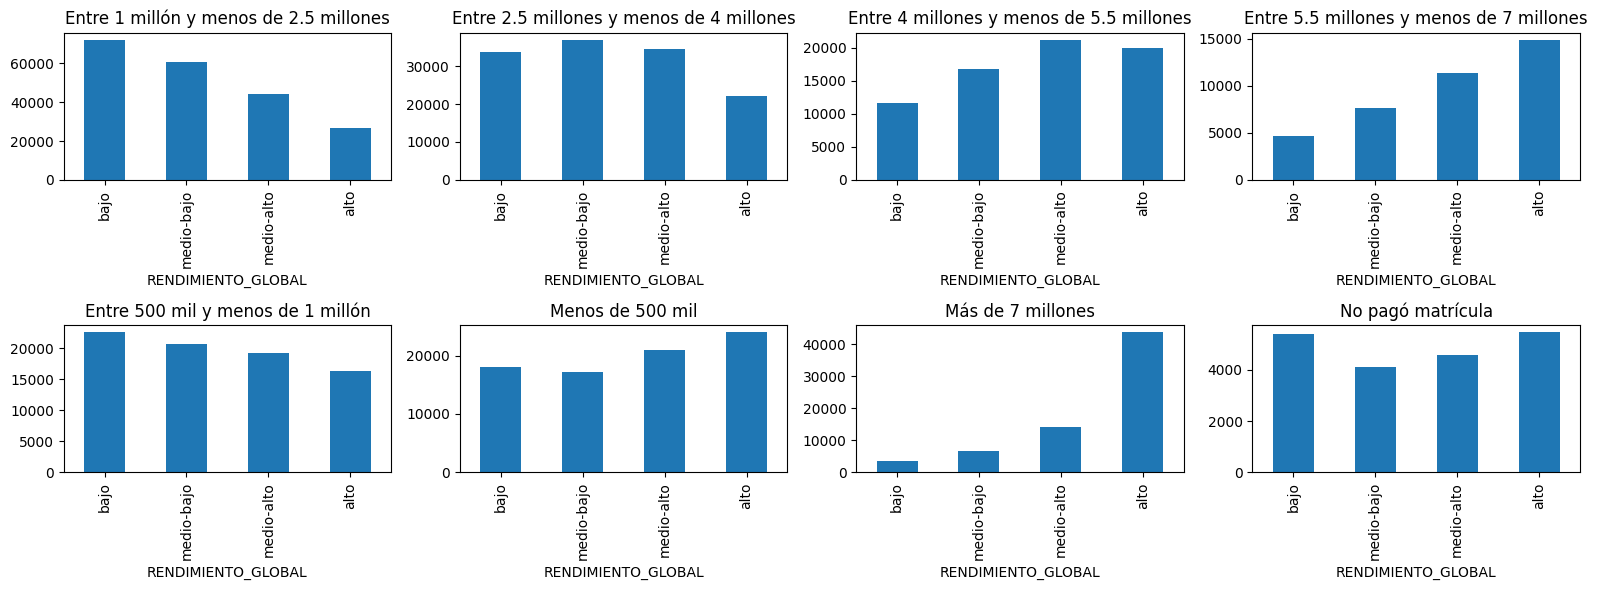

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

# Distribución de horas de trabajo semanal

<Axes: title={'center': 'Distribución de Horas de Trabajo Semanal'}, ylabel='proportion'>

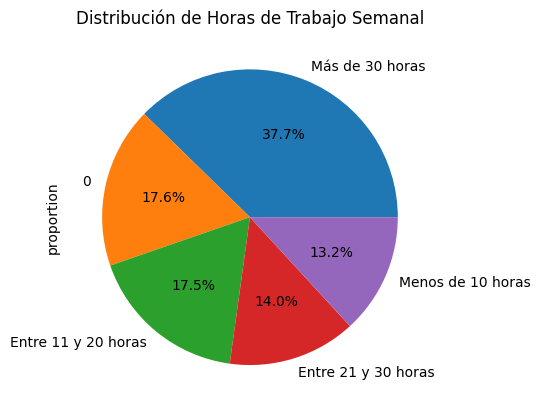

In [ ]:
frequencies = z['ESTU_HORASSEMANATRABAJA'].value_counts(normalize=True)
frequencies.plot(kind='pie', autopct='%1.1f%%', title='Distribución de Horas de Trabajo Semanal')

#Distribucion del estrato socioeconómico segun el costo de la matricula

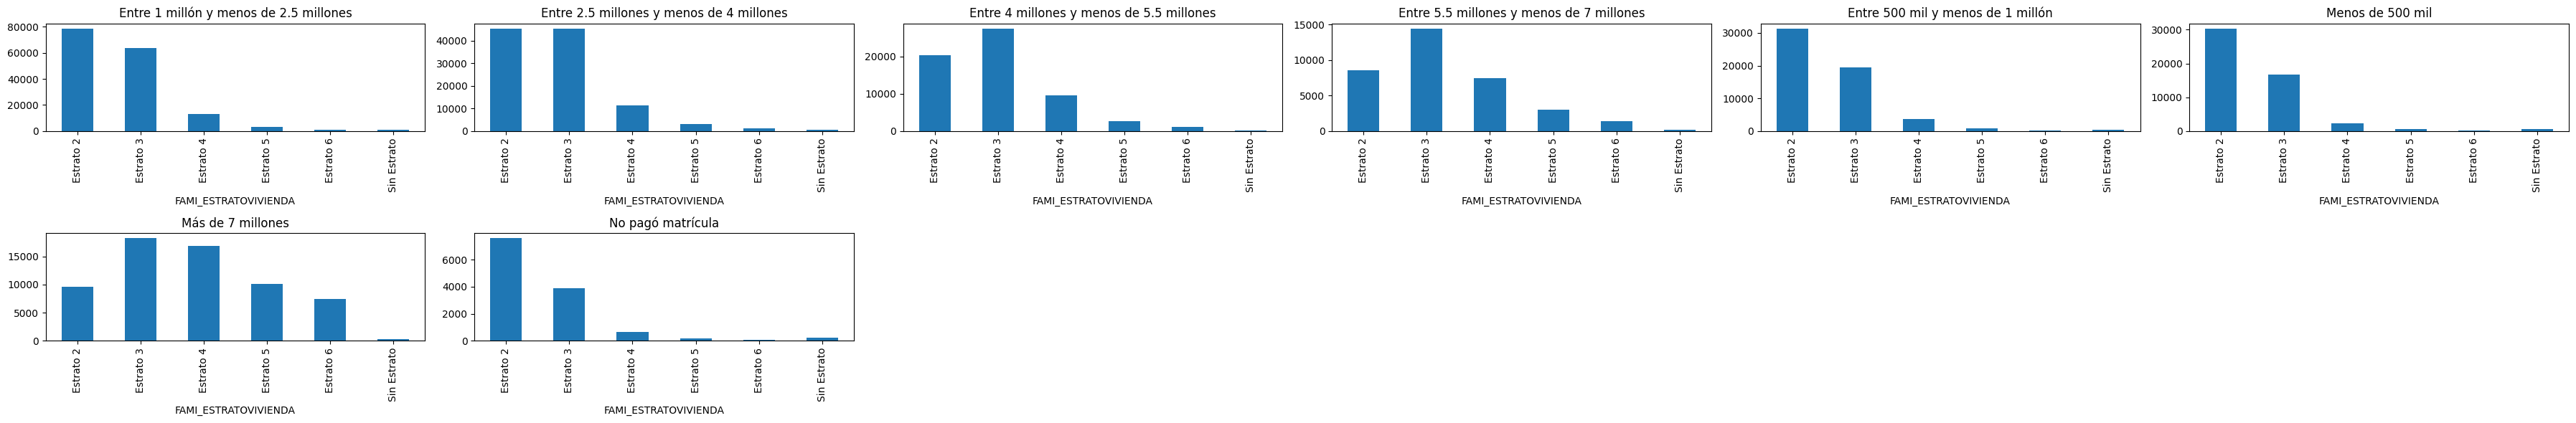

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=6, usizex=6):
    zc = z[z.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.FAMI_ESTRATOVIVIENDA.value_counts()[['Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato']].plot(kind='bar')
    plt.title(ci)

# Distribución del nivel educativo de la madre y la padre

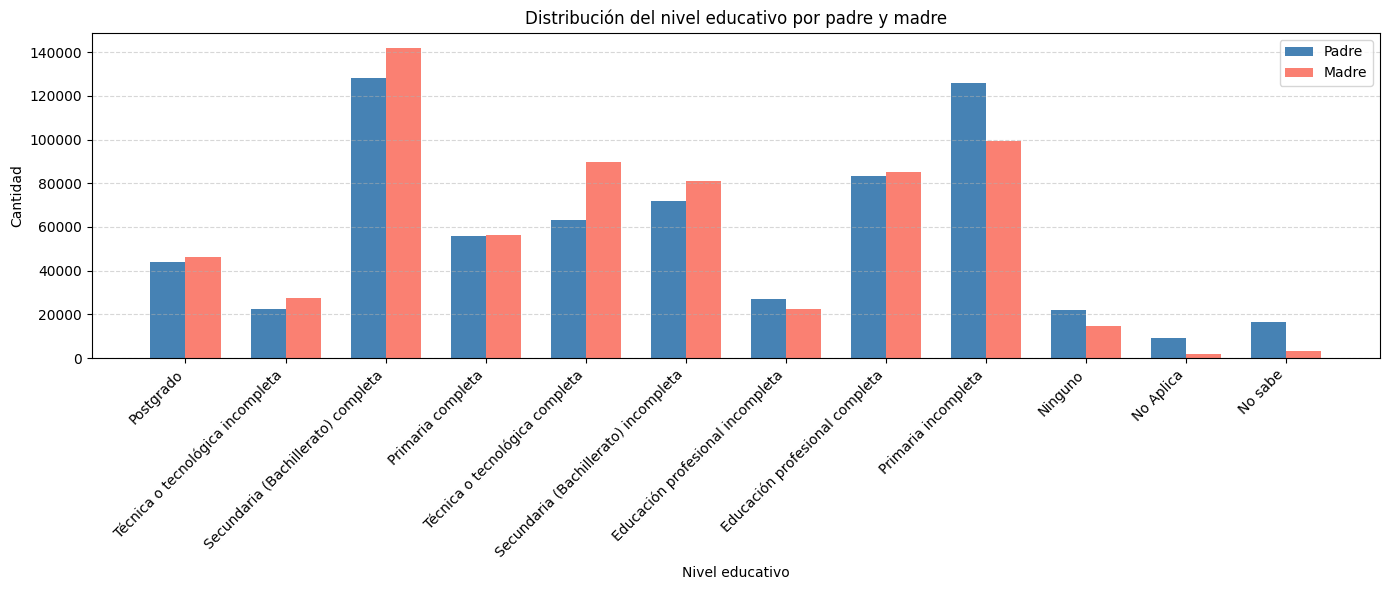

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lista de categorías
niveles_educativos = [
    'Postgrado', 'Técnica o tecnológica incompleta',
    'Secundaria (Bachillerato) completa', 'Primaria completa',
    'Técnica o tecnológica completa', 'Secundaria (Bachillerato) incompleta',
    'Educación profesional incompleta', 'Educación profesional completa',
    'Primaria incompleta', 'Ninguno', 'No Aplica', 'No sabe'
]

# Contamos las apariciones en cada columna
conteo_padre = z['FAMI_EDUCACIONPADRE'].value_counts()
conteo_madre = z['FAMI_EDUCACIONMADRE'].value_counts()

# Aseguramos que todas las categorías estén presentes en el orden definido
conteo_padre = pd.Series({nivel: conteo_padre.get(nivel, 0) for nivel in niveles_educativos})
conteo_madre = pd.Series({nivel: conteo_madre.get(nivel, 0) for nivel in niveles_educativos})

# Posiciones para las barras
x = np.arange(len(niveles_educativos))
width = 0.35  # ancho de las barras

# Crear la gráfica
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, conteo_padre, width, label='Padre', color='steelblue')
plt.bar(x + width/2, conteo_madre, width, label='Madre', color='salmon')

# Etiquetas y formato
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.title('Distribución del nivel educativo por padre y madre')
plt.xticks(ticks=x, labels=niveles_educativos, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Conclusiones

- Se observa que la mayor cantidad de estudiantes que presentaron las pruebas Saber Pro se encuentran localizados en departamentos más industrializados.

- Al analizar el comportamiento del rendimiento global según el costo de matrícula, se observa que el rango con mayores variaciones en los rendimientos corresponde a los costos superiores a 7 millones de pesos. En este caso, se puede deducir que el rendimiento global es directamente proporcional al valor de la matrícula.

  Por otro lado, al observar el caso mínimo, es decir, las matrículas menores a 2.5 millones, se evidencia que la relación es inversamente proporcional: a menor valor de matrícula, mayor rendimiento global.

  Analizando los comportamientos en los diferentes rangos de matrícula, se identifican dos cambios bruscos. El primero ocurre entre el intervalo de menos de 500 mil pesos y el de entre 500 mil y menos de un millón, donde la tendencia pasa a ser decreciente. El segundo cambio se da entre el intervalo de 2.5 millones a menos de 4 millones, y el de 4 millones a menos de 5.5 millones, donde la tendencia se vuelve creciente.

- Analizando el comportamiento de la distribución de los estudiantes según el costo de la matrícula, se observa que la proporción de estudiantes en el rango de 1 millón a 2.5 millones se reduce a la mitad al pasar al intervalo de 2.5 millones a 4 millones. Esto evidencia una disminución en la cantidad de estudiantes que pueden pagar matrículas más altas, lo cual corrobora la relación entre la capacidad económica y el estrato socioeconómico de los estudiantes.

  Además, en el intervalo de matrículas superiores a 7 millones, se registra una reducción significativa en el número de estudiantes, concentrándose principalmente aquellos pertenecientes a los estratos 4, 5 y 6.

- En la distribución del nivel educativo en primaria incompleta, observamos mayor frecuencia en el caso de los padres, intuyendo una causa la necesidad de apoyo económico de los jovenes en sus hogares.

  Sin embargo, en el caso del Bachillerato incompleto, vemos predominancia en el caso de las madres, sospechando una posible causa los embarazos adolescentes, y como estos limitan la continuidad del estudio.

  En la educación superior, no hay una predominancia según el genéro, pero observamos menor cantidad de personas que lo llegan a realizar, comparado con los demás niveles académicos.